In [1]:
# Data manipulation imports
import pandas as pd

# Plotting imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gov = pd.read_csv('gov.csv')
gov.head()

,country,life_expectancy,gdp_per_cap,average_years_of_school,total_population,auto_demo,happiness,freedom,less_corruption
0,Afghanistan,63.377,12381.3665,0.35,34414000.0,-1.0,3.575,0.23414,0.09719
1,Albania,78.025,11228.9510,3.31,2891000.0,9.0,4.959,0.35733,0.06413
2,Algeria,76.090,12077.4440,0.78,39728000.0,2.0,5.605,0.28579,0.17383
3,Angola,59.398,5530.3374,3.26,27884000.0,-2.0,4.033,0.10384,0.07122
4,Argentina,76.068,16414.0780,5.92,43075000.0,9.0,6.574,0.44974,0.08484


## EDA
Look for trends in the data before modeling - ****please note that corruption is measured as it pertains to happiness, so the higher the corruption value is the _less_ corrupt the country is because citizens rate happiness higher (per index)****

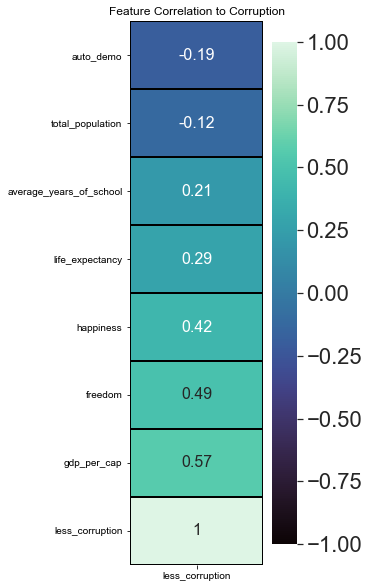

In [3]:
plt.figure(figsize = (3, 10))
ax = plt.axes()
ax.set_title('Feature Correlation to Corruption')
corr = gov.corr()[['less_corruption']]
sns.set(font_scale = 2)
sns.heatmap(corr.sort_values(by = 'less_corruption', ascending = True), 
            annot = True, cmap = 'mako', vmin = -1, vmax = 1, linecolor = 'black', 
            linewidth = 1, annot_kws = {'fontsize' : 16});

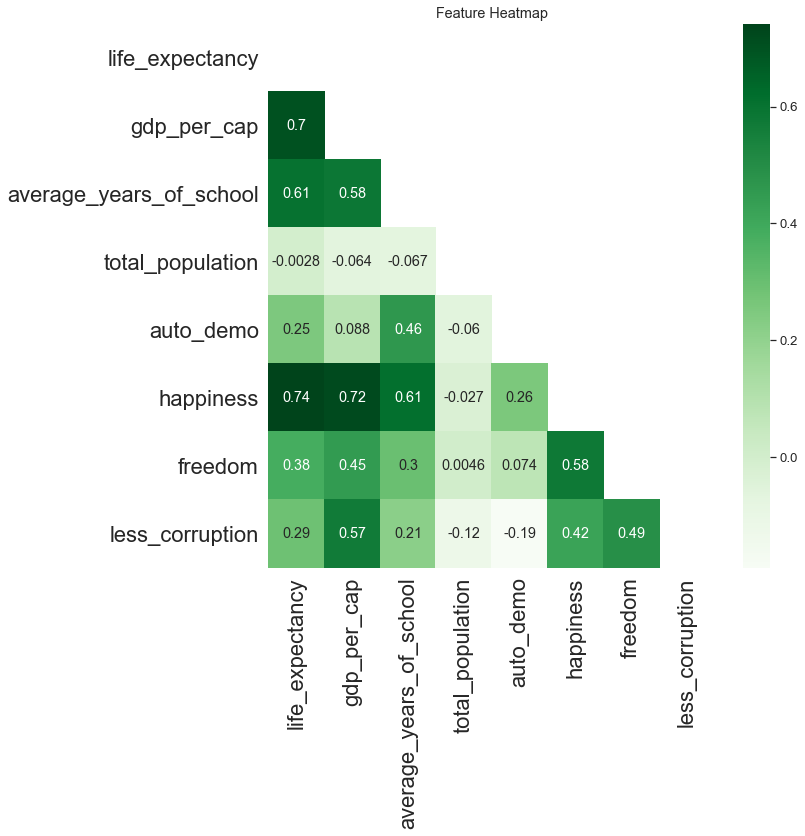

In [4]:
corr = gov.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.figure(figsize = (10, 10))
ax = plt.axes()
sns.set(font_scale = 1.2)
ax.set_facecolor('white')
sns.heatmap(corr, annot = True, cmap = "Greens", mask = mask, ax = ax)
ax.set_title('Feature Heatmap')
plt.show()

Explore relationships of all variables to corruption:

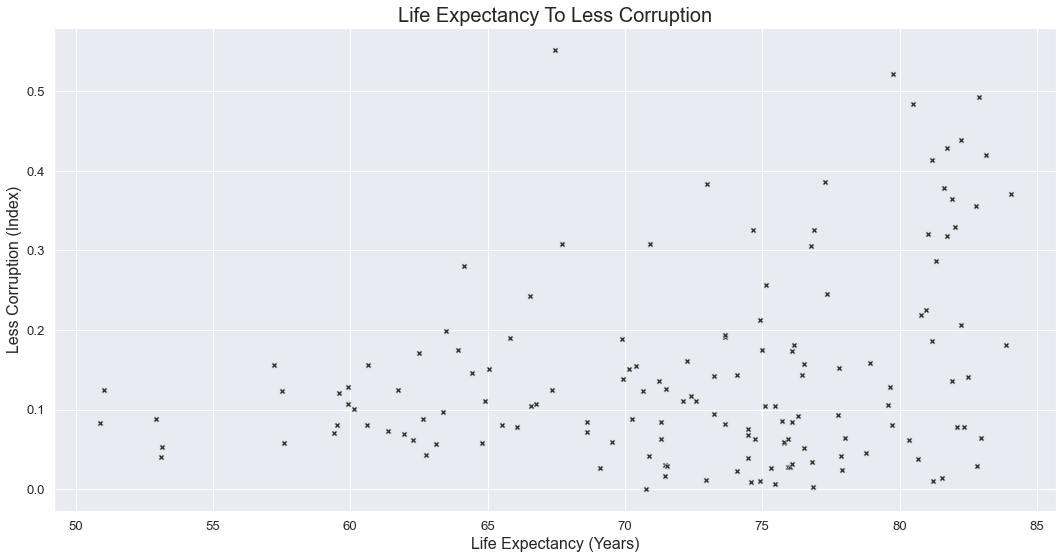

In [5]:
# Check food life expectancy against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'life_expectancy', y = 'less_corruption', color = '.2', marker = 'X') #credit to Seaborn documenta

plt.title('Life Expectancy To Less Corruption', size = 20)
plt.xlabel('Life Expectancy (Years)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

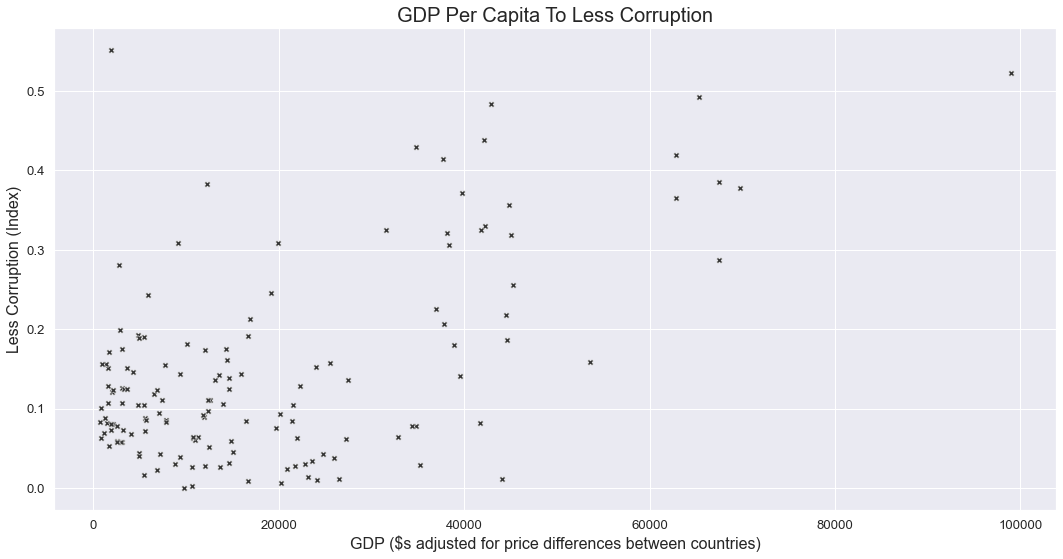

In [6]:
# Check food gdp against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'gdp_per_cap', y = 'less_corruption', color = '.2', marker = 'X') 

plt.title('GDP Per Capita To Less Corruption', size = 20)
plt.xlabel('GDP ($s adjusted for price differences between countries)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

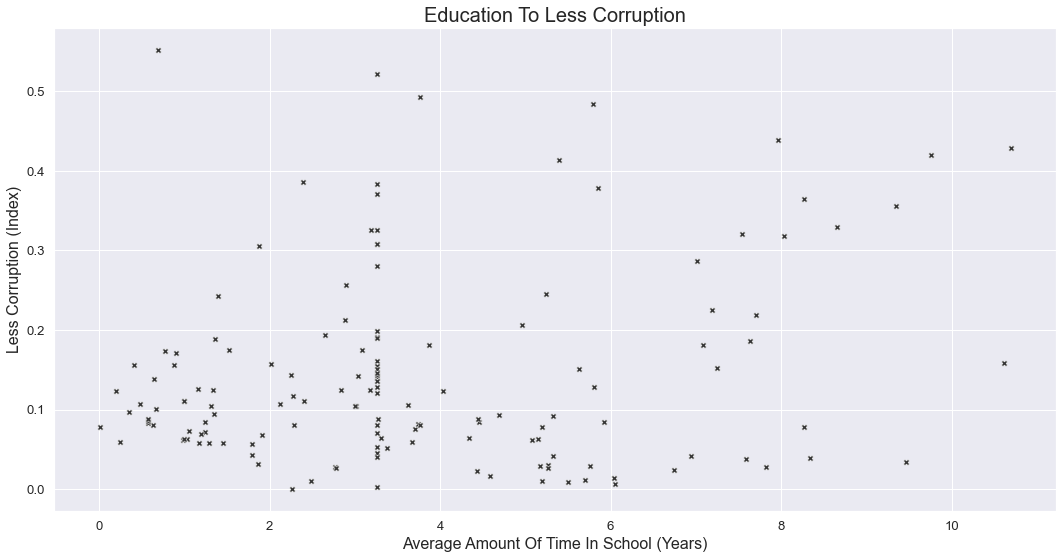

In [7]:
# Check food education against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'average_years_of_school', y = 'less_corruption', color = '.2', marker = 'X')

plt.title('Education To Less Corruption', size = 20)
plt.xlabel('Average Amount Of Time In School (Years)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

Not as strong a correlation between school and less corruption, but a strong correlation between time in school and happiness and life expectancy:

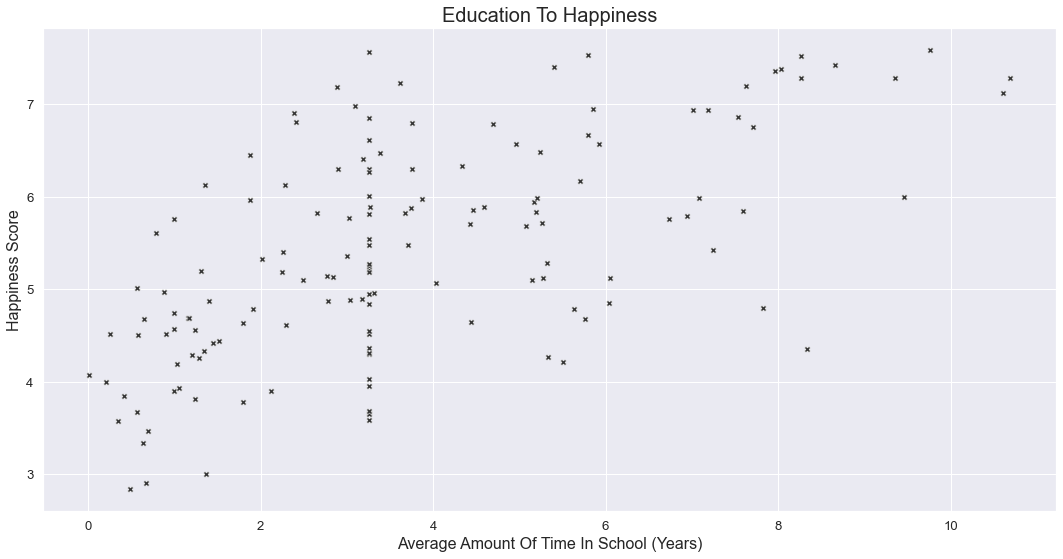

In [8]:
# Check education against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'average_years_of_school', y = 'happiness', color = '.2', marker = 'X')

plt.title('Education To Happiness', size = 20)
plt.xlabel('Average Amount Of Time In School (Years)', size = 16)
plt.ylabel('Happiness Score', size = 16)

plt.tight_layout();

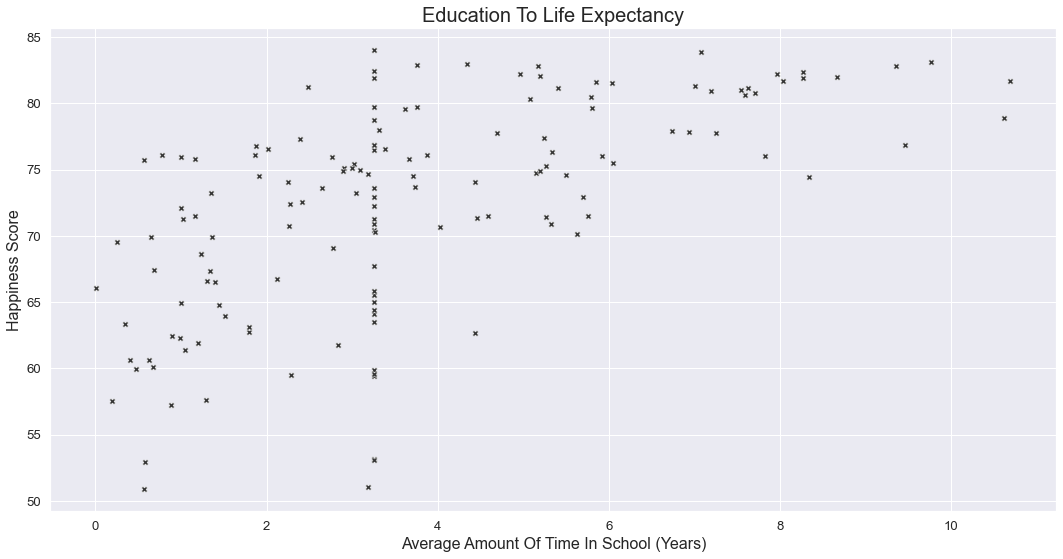

In [9]:
# Check education against happiness
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'average_years_of_school', y = 'life_expectancy', color = '.2', marker = 'X')
plt.title('Education To Life Expectancy', size = 20)
plt.xlabel('Average Amount Of Time In School (Years)', size = 16)
plt.ylabel('Life Expectancy (Years)', size = 16)

plt.tight_layout();

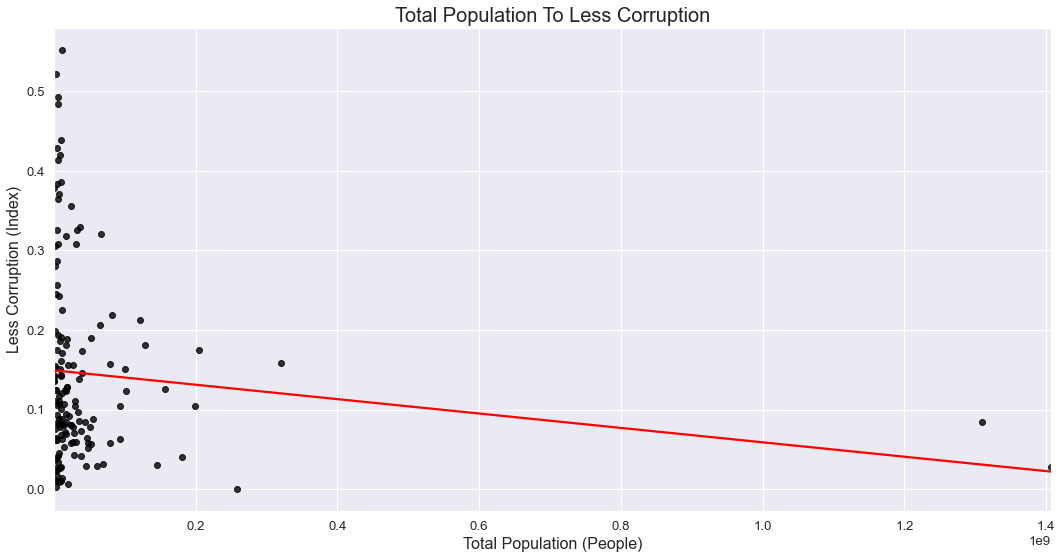

In [10]:
# Check total population against less corruption
plt.figure(figsize = (15, 8))
sns.regplot(data = gov, x = 'total_population', y = 'less_corruption', scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'}, ci = None)

plt.title('Total Population To Less Corruption', size = 20)
plt.xlabel('Total Population (People)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)
g.set_xscale('log')

plt.tight_layout();

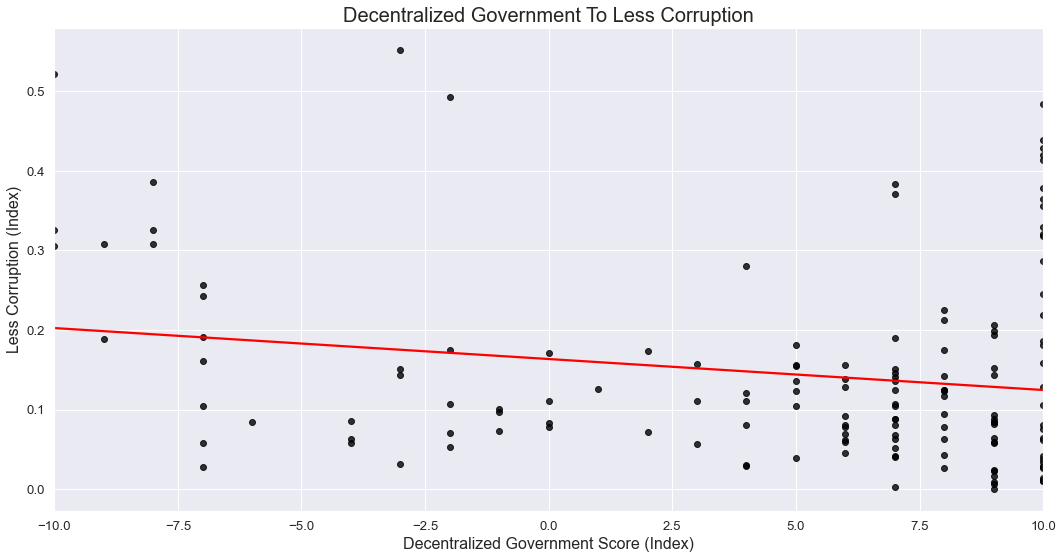

In [11]:
# Check decentralized gov against happiness
plt.figure(figsize = (15, 8))
sns.regplot(data = gov, x = 'auto_demo', y = 'less_corruption', scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'}, ci = None)

plt.title('Decentralized Government To Less Corruption', size = 20)
plt.xlabel('Decentralized Government Score (Index)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

In [12]:
gov.sort_values(by = 'auto_demo', ascending = True).head(10)

,country,life_expectancy,gdp_per_cap,average_years_of_school,total_population,auto_demo,happiness,freedom,less_corruption
111,Saudi Arabia,74.651,41863.2110,3.19,3.171800e+07,-10.0,6.411,0.31048,0.32524
9,Bahrain,76.762,38388.5660,1.88,1.372000e+06,-10.0,5.960,0.45492,0.30600
107,Qatar,79.758,98941.2030,3.26,2.566000e+06,-10.0,6.611,0.64040,0.52208
126,Syria,69.908,4955.8501,1.36,1.799700e+07,-9.0,3.006,0.15684,0.18906
142,Uzbekistan,70.928,9141.5137,3.26,3.093000e+07,-9.0,6.003,0.65821,0.30826
99,Oman,76.887,31585.5180,3.26,4.267000e+06,-8.0,6.853,0.63274,0.32524
135,Turkmenistan,67.704,19895.8180,3.26,5.565000e+06,-8.0,5.548,0.47610,0.30844
138,United Arab Emirates,77.285,67469.6480,2.39,9.263000e+06,-8.0,6.901,0.64157,0.38583
28,China,75.928,12009.4430,2.77,1.406848e+09,-7.0,5.140,0.51697,0.02781
68,Kuwait,75.130,45232.6090,2.90,3.836000e+06,-7.0,6.295,0.55499,0.25609


In [13]:
gov_no_oil = gov[gov['auto_demo'] > -8]
gov_no_oil.head()

,country,life_expectancy,gdp_per_cap,average_years_of_school,total_population,auto_demo,happiness,freedom,less_corruption
0,Afghanistan,63.377,12381.3665,0.35,34414000.0,-1.0,3.575,0.23414,0.09719
1,Albania,78.025,11228.9510,3.31,2891000.0,9.0,4.959,0.35733,0.06413
2,Algeria,76.090,12077.4440,0.78,39728000.0,2.0,5.605,0.28579,0.17383
3,Angola,59.398,5530.3374,3.26,27884000.0,-2.0,4.033,0.10384,0.07122
4,Argentina,76.068,16414.0780,5.92,43075000.0,9.0,6.574,0.44974,0.08484


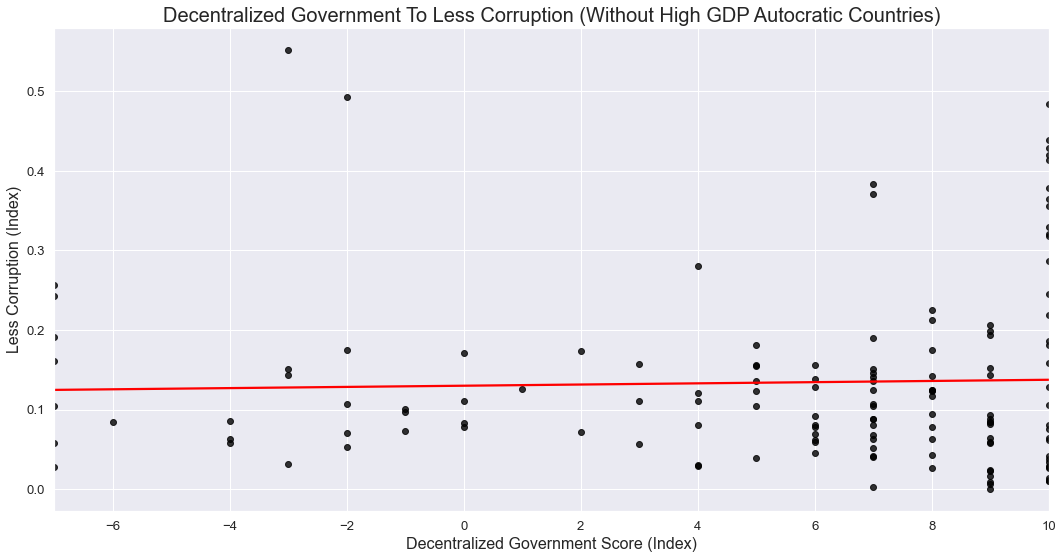

In [14]:
# Check decentralized gov against happiness
plt.figure(figsize = (15, 8))
sns.regplot(data = gov_no_oil, x = 'auto_demo', y = 'less_corruption', scatter_kws = {'color': 'black'},
            line_kws = {'color': 'red'}, ci = None)

plt.title('Decentralized Government To Less Corruption (Without High GDP Autocratic Countries)', size = 20)
plt.xlabel('Decentralized Government Score (Index)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

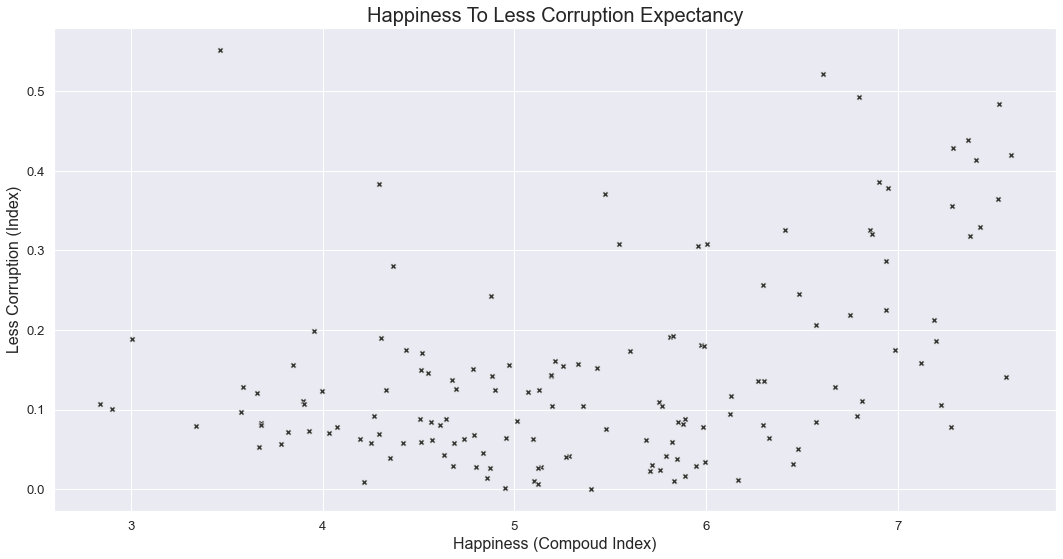

In [15]:
# Check happiness against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'happiness', y = 'less_corruption', color = '.2', marker = 'X')
plt.title('Happiness To Less Corruption Expectancy', size = 20)
plt.xlabel('Happiness (Compoud Index)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

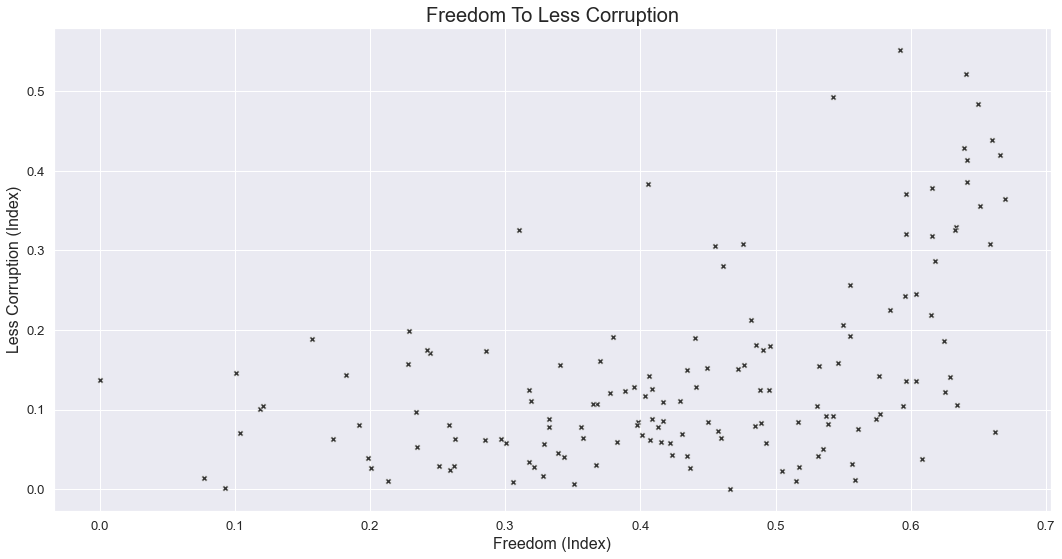

In [16]:
# Check freedom against less corruption
plt.figure(figsize = (15, 8))
g = sns.scatterplot(data = gov, x = 'freedom', y = 'less_corruption', color = '.2', marker = 'X')
plt.title('Freedom To Less Corruption', size = 20)
plt.xlabel('Freedom (Index)', size = 16)
plt.ylabel('Less Corruption (Index)', size = 16)

plt.tight_layout();

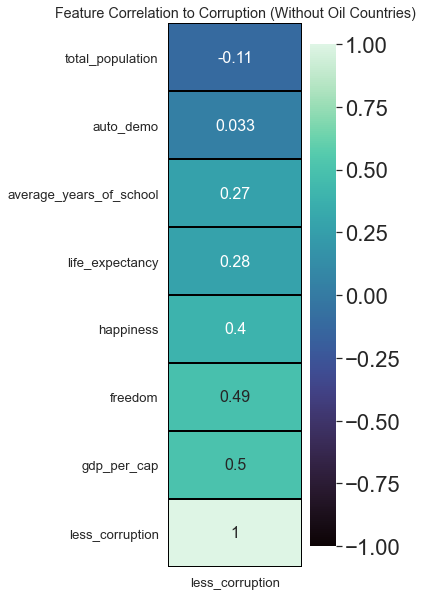

In [17]:
plt.figure(figsize = (3, 10))
ax = plt.axes()
ax.set_title('Feature Correlation to Corruption (Without Oil Countries)')
corr = gov_no_oil.corr()[['less_corruption']]
sns.set(font_scale = 2)
sns.heatmap(corr.sort_values(by = 'less_corruption', ascending = True), 
            annot = True, cmap = 'mako', vmin = -1, vmax = 1, linecolor = 'black', 
            linewidth = 1, annot_kws = {'fontsize' : 16});

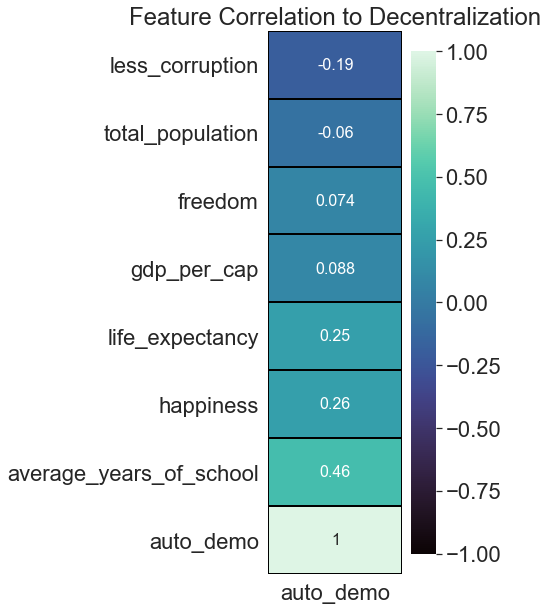

In [18]:
plt.figure(figsize = (3, 10))
ax = plt.axes()
ax.set_title('Feature Correlation to Decentralization')
corr = gov.corr()[['auto_demo']]
sns.set(font_scale = 2)
sns.heatmap(corr.sort_values(by = 'auto_demo', ascending = True), 
            annot = True, cmap = 'mako', vmin = -1, vmax = 1, linecolor = 'black', 
            linewidth = 1, annot_kws = {'fontsize' : 16});

In [19]:
# Finally, look for values for Switzerland as a case study
gov[gov['country'] == 'Switzerland']

,country,life_expectancy,gdp_per_cap,average_years_of_school,total_population,auto_demo,happiness,freedom,less_corruption
125,Switzerland,83.142,62835.66,9.76,8297000.0,10.0,7.587,0.66557,0.41978
